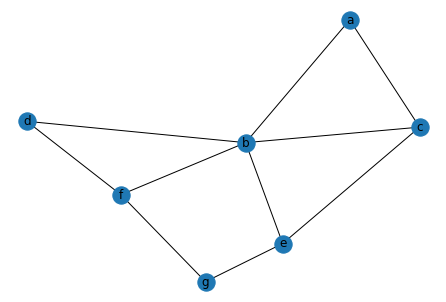

F= set() ; dist= {'a': 0, 'b': inf, 'c': inf, 'd': inf, 'f': inf, 'e': inf, 'g': inf} ; W= {}
F= {'a'} ; dist= {'a': 0, 'b': 3, 'c': 1, 'd': inf, 'f': inf, 'e': inf, 'g': inf} ; W= {'b': 'a', 'c': 'a'}
F= {'a', 'c'} ; dist= {'a': 0, 'b': 3, 'c': 1, 'd': inf, 'f': inf, 'e': 2, 'g': inf} ; W= {'b': 'a', 'c': 'a', 'e': 'c'}
F= {'e', 'a', 'c'} ; dist= {'a': 0, 'b': 3, 'c': 1, 'd': inf, 'f': inf, 'e': 2, 'g': 19} ; W= {'b': 'a', 'c': 'a', 'e': 'c', 'g': 'e'}
F= {'e', 'a', 'b', 'c'} ; dist= {'a': 0, 'b': 3, 'c': 1, 'd': 6, 'f': 11, 'e': 2, 'g': 19} ; W= {'b': 'a', 'c': 'a', 'e': 'c', 'g': 'e', 'd': 'b', 'f': 'b'}
F= {'d', 'e', 'a', 'b', 'c'} ; dist= {'a': 0, 'b': 3, 'c': 1, 'd': 6, 'f': 10, 'e': 2, 'g': 19} ; W= {'b': 'a', 'c': 'a', 'e': 'c', 'g': 'e', 'd': 'b', 'f': 'd'}
F= {'d', 'e', 'a', 'b', 'f', 'c'} ; dist= {'a': 0, 'b': 3, 'c': 1, 'd': 6, 'f': 10, 'e': 2, 'g': 15} ; W= {'b': 'a', 'c': 'a', 'e': 'c', 'g': 'f', 'd': 'b', 'f': 'd'}
['a', 'b', 'd', 'f', 'g']
15
F= set() ; dist= [(0, 's')]

In [19]:
import heapq

import matplotlib.pyplot as plt;
import networkx as nx  # -*- coding: utf-8 -*-


def Dijkstra(G, start, target):
    states = []
    F = set()
    dist = {v: float("inf") for v in G}
    dist[start] = 0
    prev = {}
    unvisited = [(dist[n], n) for n in G]
    heapq.heapify(unvisited)
    while len(unvisited):
        states.append((F.copy(), dist.copy(), prev.copy()))
        current = heapq.heappop(unvisited)[1]
        F.add(current)
        if current == target:
            for entry in states:
                print('F=', entry[0], '; dist=', entry[1], "; W=", entry[2])
            return prev
        for n in G[current]:
            if n in F:
                continue
            new_dist = dist[current] + G[current][n]['weight']
            if new_dist >= dist[n]:
                continue
            dist[n] = new_dist
            prev[n] = current
        unvisited = [(dist[v], v) for v in G if not v in F]
        heapq.heapify(unvisited)
    for entry in states:
        print('F=', entry[0], '; dist=', entry[1], "; W=", entry[2])
    return None


def AStar(G, start, target, h):
    states = []

    openSet = {start}
    dist = [(0, start)]
    heapq.heapify(dist)
    previous = {}
    g = {start: 0}
    F = set()
    while len(dist):
        states.append((F.copy(), dist.copy(), previous.copy()))
        current = heapq.heappop(dist)[1]
        openSet.remove(current)

        if current == target:
            for entry in states:
                print('F=', entry[0], '; dist=', entry[1], "; W=", entry[2])
            return previous
        F.add(current)
        for n in G[current]:
            if n in F:
                continue
            tentative_g = g[current] + G[current][n]['weight']
            if n in openSet and tentative_g > g[n]:
                continue
            previous[n] = current
            g[n] = tentative_g
            f = tentative_g + h(n)
            if n in openSet:
                dist = [(f, n) if e[1] == n else e for e in dist]  #not perfectly efficient
                heapq.heapify(dist)
            else:
                heapq.heappush(dist, (f, n))
                openSet.add(n)
    for entry in states:
        print('F=', entry[0], '; dist=', entry[1], "; W=", entry[2])
    return None


def GetPath(prev, target):
    path = [target]
    current = target
    while current in prev:
        current = prev[current]
        path.append(current)
    path.reverse()
    return path


def GetLength(g: nx.Graph, path: list):
    length = 0
    for i in range(0, len(path)):
        if i + 1 < len(path):
            length += g[path[i]][path[i + 1]]["weight"]
    return length


G = nx.Graph()
G.add_edge("a", "b", weight=3)
G.add_edge("a", "c", weight=1)
G.add_edge("b", "d", weight=3)
G.add_edge("b", "f", weight=8)
G.add_edge("b", "e", weight=6)
G.add_edge("c", "b", weight=5)
G.add_edge("c", "e", weight=1)
G.add_edge("d", "f", weight=4)
G.add_edge("e", "g", weight=17)
G.add_edge("f", "g", weight=5)

nx.draw(G, with_labels=True)
plt.show()

paths = Dijkstra(G, "a", "g")
print(GetPath(paths, 'g'))
print(GetLength(G, GetPath(paths, 'g')))


def h(node: str):
    if node == "z":
        return 0
    elif node == "i":
        return 26
    elif node == "h":
        return 20
    elif node == "g":
        return 21
    elif node == "b":
        return 35
    elif node == "c":
        return 38
    elif node == "a":
        return 40
    elif node == "f":
        return 50
    elif node == "e":
        return 55
    elif node == "d":
        return 48
    elif node == "s":
        return 45


G2 = nx.Graph()

G2.add_edge("z", "i", weight=32)
G2.add_edge("z", "h", weight=22)
G2.add_edge("z", "g", weight=24)
G2.add_edge("i", "h", weight=9)
G2.add_edge("i", "b", weight=12)
G2.add_edge("i", "c", weight=12)
G2.add_edge("h", "g", weight=8)
G2.add_edge("g", "b", weight=19)
G2.add_edge("g", "a", weight=22)
G2.add_edge("c", "d", weight=10)
G2.add_edge("c", "b", weight=8)
G2.add_edge("c", "s", weight=7)
G2.add_edge("b", "a", weight=7)
G2.add_edge("b", "s", weight=10)
G2.add_edge("a", "s", weight=11)
G2.add_edge("a", "f", weight=10)
G2.add_edge("d", "s", weight=7)
G2.add_edge("d", "e", weight=9)
G2.add_edge("f", "e", weight=9)
G2.add_edge("f", "s", weight=8)
G2.add_edge("e", "s", weight=10)

path = GetPath(AStar(G2, "s", "z", h), "z")
print(path)
print(GetLength(G2, path))

G3 = nx.Graph()

G3.add_edge("a", "b", weight=3)
G3.add_edge("a", "c", weight=3)
G3.add_edge("a", "d", weight=2)
G3.add_edge("a", "f", weight=4)
G3.add_edge("a", "z", weight=4)

G3.add_edge("b", "c", weight=10)

G3.add_edge("c", "d", weight=1)
G3.add_edge("c", "e", weight=2)
G3.add_edge("c", "z", weight=4)

G3.add_edge("d", "f", weight=9)
G3.add_edge("d", "s", weight=7)
G3.add_edge("d", "z", weight=2)

G3.add_edge("e", "s", weight=3)

G3.add_edge("f", "s", weight=2)


def h3(node: str):
    if node == "a":
        return 3
    elif node == "b":
        return 6
    elif node == "c":
        return 3
    elif node == "d":
        return 2
    elif node == "e":
        return 5
    elif node == "f":
        return 7
    elif node == "s":
        return 8
    elif node == "z":
        return 0


path = GetPath(Dijkstra(G3, "s", "z"), "z")
print(path)
print(GetLength(G3, path))

path = GetPath(AStar(G3, "s", "z", h3), "z")
print(path)
print(GetLength(G3, path))


def MergeDicts(d1, d2):
    merged_dict = {v: k for k, v in d2.items()}
    merged_dict.update(d1)
    return merged_dict

def DoubleDijkstra(G, start, target):
    F1 = set()
    F2 = set()

    dist1 = {v: float("inf") for v in G}
    dist2 = {v: float("inf") for v in G}

    dist1[start] = 0
    dist2[target] = 0

    prev1 = {}
    prev2 = {}

    unvisited1 = [(dist1[n], n) for n in G]
    unvisited2 = [(dist2[n], n) for n in G]

    heapq.heapify(unvisited1)
    heapq.heapify(unvisited2)

    current1 = ""
    current2 = ""
    while len(unvisited1) and len(unvisited2):
        current1 = heapq.heappop(unvisited1)[1]
        F1.add(current1)

        for n in G[current1]:
            if n in F1:
                continue
            new_dist = dist1[current1] + G[current1][n]['weight']
            if new_dist >= dist1[n]:
                continue
            dist1[n] = new_dist
            prev1[n] = current1

        if current2 == start or current1 == current2:
            print("DoubleDijkstra Iterations:", len(F1) + len(F2))
            return MergeDicts(prev1, prev2)

        unvisited1 = [(dist1[v], v) for v in G if not v in F1]
        heapq.heapify(unvisited1)

        current2 = heapq.heappop(unvisited2)[1]
        F2.add(current2)

        for n in G[current2]:
            if n in F2:
                continue
            new_dist = dist2[current2] + G[current2][n]['weight']
            if new_dist >= dist2[n]:
                continue
            dist2[n] = new_dist
            prev2[n] = current2

        if current1 == target or current1 == current2:
            print("DoubleDijkstra Iterations:", len(F1) + len(F2))
            return MergeDicts(prev1, prev2)

        unvisited2 = [(dist2[v], v) for v in G if not v in F2]
        heapq.heapify(unvisited2)

    print("Double Dijkstra Iterations:", len(F1) + len(F2))
    return MergeDicts(prev1, prev2)

print("Double Dijkstra")
paths = DoubleDijkstra(G2, "s", "z")
path = GetPath(paths, "z")
print(path)
print(GetLength(G2, path))